In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import sys
sys.path.append('/home/chenani/ownCloud/Workspaces/Eclipse/dataAnalysis/Sleep-current/src/')

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as pl
import pickle as pkl
import os
import fnmatch
import itertools
import statsmodels.formula.api as sm
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import ranksums
from scipy.stats import linregress
import pandas as pd
import seaborn as sns

In [3]:
sns.set_style('white')
sns.set_context("poster",font_scale=1.7)
clr4 = ["#cb535a","#5ba952","#c97d3d","#9a993e"]
cl3 = ["#cb6a49","#a46cb7","#7aa457"]
clrs = ["#e55982","#41c563","#874ac4","#77ba3f","#b171ed","#aab632","#4e6ddc","#408f2c","#de5fcd","#80bc6a",
        "#a63798","#5bc79f","#dd378e","#508d4e","#c174d6","#cca238","#754da1","#e18e31","#9488e0","#dd6a35","#4fbddc",
        "#c23d26","#5d92d3","#d33f4f","#379680","#da63a9","#416831","#e38edb","#7a7529","#5163a5","#b0b166","#b03063",
        "#da9c6b","#a96cae","#995e2b","#bea0df","#d77768","#97527f","#e08aa5","#9f4d5a"]
colors = ['#FF0000', '#0000FF', '#008000', '#00FFFF', '#FF00FF', '#EE82EE',
        '#808000', '#800080', '#FF6347', '#FFFF00', '#9ACD32', '#4B0082',
        '#FFFACD', '#C0C0C0', '#A0522D', '#FA8072', '#FFEFD5', '#E6E6FA',
        '#F1FAC1', '#C5C5C5', '#A152ED', '#FADD72', '#F0EFD0', '#EEE6FF',
        '#01FAC1', '#F5F5F5', '#A152FF', '#FAFD72', '#F0EFDF', '#EEEFFF',
        '#F1FA99', '#C9C9C9', '#A152DD', '#FA5572', '#FFFFD0', '#EDD6FF']
def locate(pattern, root=os.curdir):
    '''
    Locate all files matching supplied filename pattern in and below
        supplied root directory.
    Parameters
    ----------
        pattern : string
            A string representing pattern you want to look for in the path.
        root : string
            contains the path address you want to look trough!
    Returns
    ----------
        Array of strings consist of two column, first contains the path and second the file names that matched 
        the desired pattern.
    '''
    for path, dirs, files in os.walk(os.path.abspath(root)):
        for filename in fnmatch.filter(files, pattern):
            yield [path,filename]

In [4]:
Lesions = sorted([os.path.join(item[0],item[1])for item in locate('*-theta-vis.lsn')])
for ls in Lesions[:-1]:
    print ls
LesionsPre = np.array([])
LesionsPost = np.array([])
for item in Lesions[:-1]:
    LesionsPre = np.append(LesionsPre,pkl.load(open(item,'rb'))[0])
    LesionsPost = np.append(LesionsPost,pkl.load(open(item,'rb'))[1])


/home/aliche/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/PCA_MEC/DATA/Rat3656-Day2-theta-vis.lsn
/home/aliche/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/PCA_MEC/DATA/Rat3656-Day3-theta-vis.lsn
/home/aliche/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/PCA_MEC/DATA/Rat3661-03-04-15Day2-theta-vis.lsn
/home/aliche/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/PCA_MEC/DATA/Rat3661-Day1-theta-vis.lsn
/home/aliche/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/PCA_MEC/DATA/Rat3754-Day1-theta-vis.lsn
/home/aliche/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/PCA_MEC/DATA/Rat3754-Day2-theta-vis.lsn
/home/aliche/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/PCA_MEC/DATA/Rat3754-Day3-theta-vis.lsn
/home/aliche/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/PCA_MEC/DATA/Rat3837-Day1-theta-vis.lsn
/home/aliche/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/PCA_MEC/DATA/Rat3837-Day2-theta-vis.lsn
/home/aliche/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_

In [5]:
Controls = [os.path.join(item[0],item[1])for item in locate('*-theta-vis.cnt')]
for cnt in sorted(Controls):
    print cnt
ControlsPre = np.array([])
ControlsPost = np.array([])
for item in Controls:
    ControlsPre = np.append(ControlsPre,pkl.load(open(item,'rb'))[0])
    ControlsPost = np.append(ControlsPost,pkl.load(open(item,'rb'))[1])


/home/aliche/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/PCA_MEC/DATA/Rat3656-Day1-theta-vis.cnt
/home/aliche/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/PCA_MEC/DATA/Rat3661-Day3-theta-vis.cnt
/home/aliche/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/PCA_MEC/DATA/Rat3839-Day1-theta-vis.cnt
/home/aliche/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/PCA_MEC/DATA/Rat3839-Day2-theta-vis.cnt
/home/aliche/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/PCA_MEC/DATA/Rat3839-Day4-theta-vis.cnt
/home/aliche/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/PCA_MEC/DATA/Rat3839-Day5-theta-vis.cnt
/home/aliche/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/PCA_MEC/DATA/Rat3906-Day1-theta-vis.cnt
/home/aliche/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/PCA_MEC/DATA/Rat3906-Day2-theta-vis.cnt
/home/aliche/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/PCA_MEC/DATA/Rat3906-Day3-theta-vis.cnt
/home/aliche/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/

/home/aliche/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/cbook/__init__.py:2400: UserWarning: Saw kwargs [u'c', u'color'] which are all aliases for u'color'.  Kept value from u'color'
  seen=seen, canon=canonical, used=seen[-1]))


RanksumsResult(statistic=-3.8667661944233482, pvalue=0.00011028807050311102)

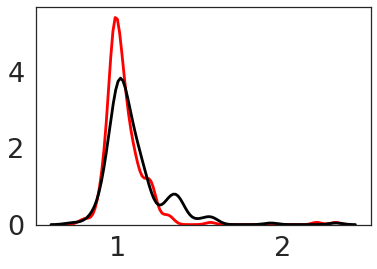

In [6]:
lRatios = LesionsPost/LesionsPre
cRatios = ControlsPost/ControlsPre
sns.kdeplot(lRatios,c='r')
sns.kdeplot(cRatios,c='k')
ranksums(lRatios,cRatios)

In [7]:
a, b, r_value_a, p_value_a, std_err_a = linregress(ControlsPre,ControlsPost,)
c,d,r_value_c, p_value_c, std_err_c = linregress(LesionsPre,LesionsPost)
print b,d
print p_value_a,p_value_c

-0.5159305342920801 -0.33226640763575643
3.6066434296238814e-73 1.0458219964700923e-44


In [8]:
data = pd.DataFrame(np.array([ControlsPre,ControlsPost,['Control']*ControlsPost.size]).T,columns=['pre','post','group'])
dfS = pd.DataFrame(np.array([np.arange(0,5,5e-2),np.arange(0,5,5e-2),['Bisec']*100]).T,columns=['pre','post','group'])
df = pd.DataFrame(np.array([LesionsPre,LesionsPost,['Lesion']*LesionsPost.size]).T,columns=['pre','post','group'])
data = data.append(df,ignore_index=True)
data = data.append(dfS,ignore_index=True)
data[['pre','post']] = data[['pre','post']].astype(float)


RanksumsResult(statistic=-3.8667661944233482, pvalue=0.00011028807050311102)

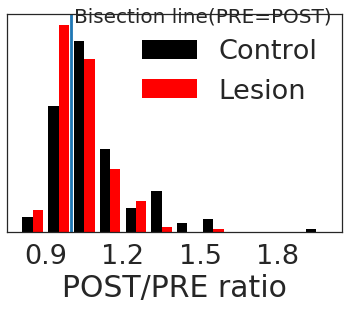

In [9]:
f,ax = pl.subplots(1,1)
lRatios = LesionsPost/LesionsPre
cRatios = ControlsPost/ControlsPre
ax.hist([cRatios,lRatios],bins=np.arange(0.8,2.1,0.1),normed=True,color=['k','r'],label=['Control','Lesion'])
ax.text(1.01, 4.2, r'Bisection line(PRE=POST)', fontsize=20)
ax.legend()
ax.set_xlabel('POST/PRE ratio')
ax.axvline(1)
ax.set_yticks([])
ax.set_xticks([0.9,1.2,1.5,1.8])


#sns.distplot(lRatios,bins=[0.9,1.2,1.5,1.8,3.0])
#sns.distplot(cRatios)
ranksums(lRatios,cRatios)

In [10]:
from statsmodels.formula.api import ols,rlm
formula = 'post ~ pre * C(group)-1'  # ANCOVA formula
lm = ols(formula, data)
Rlm = rlm(formula, data)
fit = lm.fit()
Rfit = Rlm.fit()
print fit.summary()
print fit.pvalues
print Rfit.summary()
print Rfit.pvalues

                            OLS Regression Results                            
Dep. Variable:                   post   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     1512.
Date:                Fri, 06 Apr 2018   Prob (F-statistic):               0.00
Time:                        20:37:12   Log-Likelihood:                 36.802
No. Observations:                 574   AIC:                            -61.60
Df Residuals:                     568   BIC:                            -35.49
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
C(group)[Bisec]          2

In [11]:
cm = sm.RLM(ControlsPost,ControlsPre).fit()
lm = sm.RLM(LesionsPost,LesionsPre).fit()
print cm.summary()
print lm.summary()

                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                  239
Model:                            RLM   Df Residuals:                      238
Method:                          IRLS   Df Model:                            0
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 06 Apr 2018                                         
Time:                        20:37:13                                         
No. Iterations:                    32                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0693      0.008    136.921      0.0

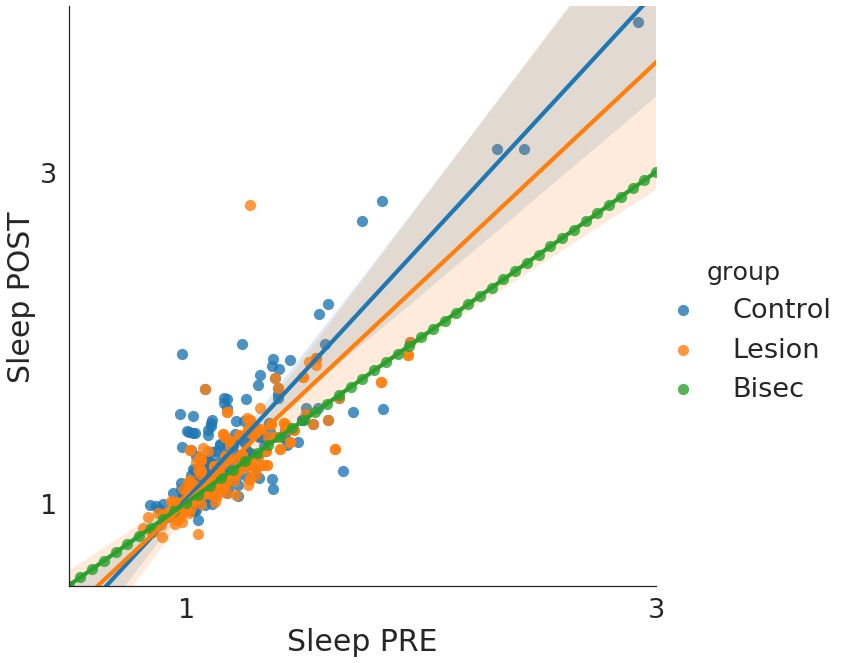

In [12]:
#f,ax  = pl.subplots(1,1,figsize = [10,10])
g = sns.lmplot(x="pre", y="post",hue='group', data=data,robust=False,size=10)  
g = (g.set_axis_labels("Sleep PRE", "Sleep POST").set(xlim=(0.5, 3), ylim=(0.5, 4),xticks=[1, 3,], yticks=[1,3]).fig.subplots_adjust(wspace=.02))

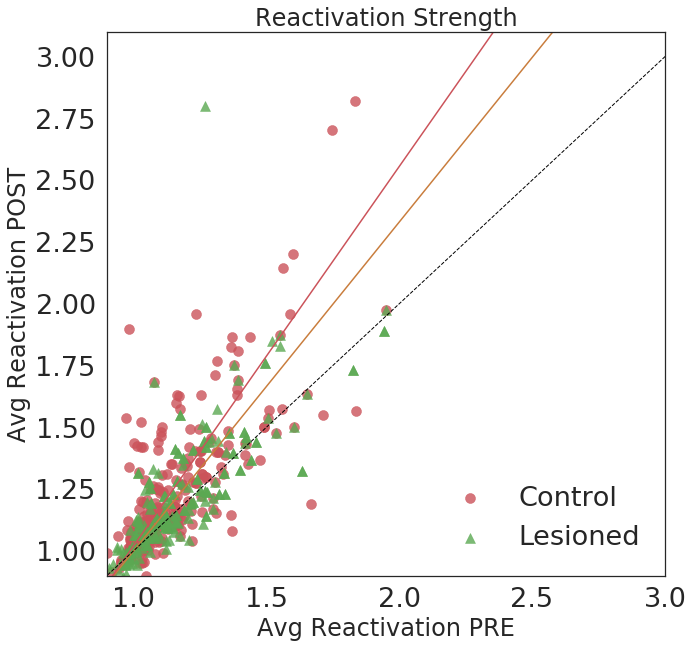

In [13]:
f,ax  = pl.subplots(1,1,figsize = [10,10])
ax.scatter(ControlsPre,ControlsPost,alpha = 0.8,label = 'Control',s=100,c=clr4[0])
ax.scatter(LesionsPre,LesionsPost,marker='^',color=clr4[1],alpha = 0.8,label='Lesioned',s=100)
ax.plot([0.8,6],[c*0.8+d, c*6+d],c =clr4[2], lw=1.5)
ax.plot([0.8,3],[a*0.8+b, a*3+b],c= clr4[0], lw=1.5)
ax.set_ylabel('Avg Reactivation POST',fontsize=24)
ax.set_xlabel('Avg Reactivation PRE',fontsize=24)
ax.plot([0.8,6],[0.8,6],'k--',lw=1)
#ax.yaxis.label.set_color('white')
#ax.xaxis.label.set_color('white')
#ax.tick_params(axis='y', colors='white')
#ax.tick_params(axis='x', colors='white')
ax.set_xlim([0.9,3])
ax.set_ylim([0.9,3.1])
ax.set_title('Reactivation Strength',fontsize=24)
pl.legend()
#f.savefig('/home/chenani/Pictures/BCCN-poster/avgReac.svg',transparent=True)

Estimated coefficients (true, normal, RANSAC):
(array([ 1.34689679]), array([ 0.4857674]))


(0.8, 2)

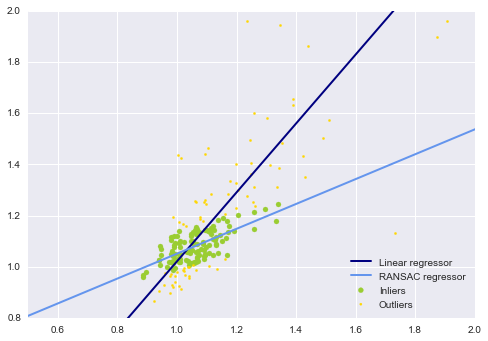

In [43]:
from sklearn.linear_model import LinearRegression, TheilSenRegressor
from sklearn.linear_model import RANSACRegressor
estimators = [('OLS', LinearRegression()),
              ('Theil-Sen', TheilSenRegressor(random_state=2)),
              ('RANSAC', RANSACRegressor(random_state=2)), ]
colors = {'OLS': 'turquoise', 'Theil-Sen': 'gold', 'RANSAC': 'lightgreen'}
lw = 2

Xl = data.pre[data.group=='Lesion'].as_matrix()
Xl = Xl.reshape([Xl.size,1])
yl = data.post[data.group=='Lesion'].as_matrix()
Xc = data.pre[data.group=='Control'].as_matrix()
Xc = Xc.reshape([Xc.size,1])
yc = data.post[data.group=='Control'].as_matrix()

## Fit line using all data
model  = LinearRegression()
model.fit(Xc, yc)

# Robustly fit linear model with RANSAC algorithm
model_ransac = RANSACRegressor(LinearRegression())
model_ransac.fit(Xc, yc)
inlier_mask = model_ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
line_X = np.arange(0, 5)
line_y = model.predict(line_X[:, np.newaxis])
line_y_ransac = model_ransac.predict(line_X[:, np.newaxis])

# Compare estimated coefficients
print("Estimated coefficients (true, normal, RANSAC):")
print( model.coef_, model_ransac.estimator_.coef_)

lw = 2
pl.scatter(Xc[inlier_mask], yc[inlier_mask], color='yellowgreen', marker='.',s=100,
            label='Inliers')
pl.scatter(Xc[outlier_mask], yc[outlier_mask], color='gold', marker='.',
            label='Outliers')
pl.plot(line_X, line_y, color='navy', linestyle='-', linewidth=lw,
         label='Linear regressor')
pl.plot(line_X, line_y_ransac, color='cornflowerblue', linestyle='-',
         linewidth=lw, label='RANSAC regressor')
pl.legend(loc='lower right')
pl.xlim([0.5,2])
pl.ylim(0.8,2)

Ttest_indResult(statistic=2.0305888602182884, pvalue=0.043164008532532043)
RanksumsResult(statistic=1.4852300755562919, pvalue=0.13748288756195906)


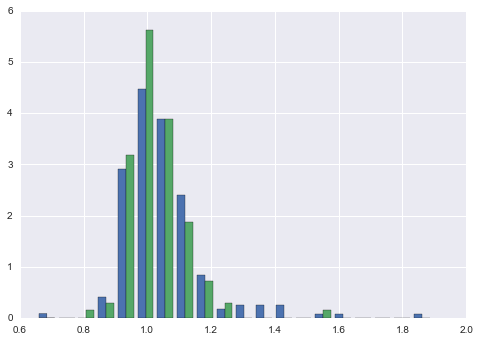

In [68]:
pl.hist([ControlsPost/ControlsPre,LesionsPost/LesionsPre],20,normed=True);
print ttest_ind(ControlsPost-ControlsPre,LesionsPost-LesionsPre)
print ranksums(ControlsPost/ControlsPre,LesionsPost/LesionsPre)

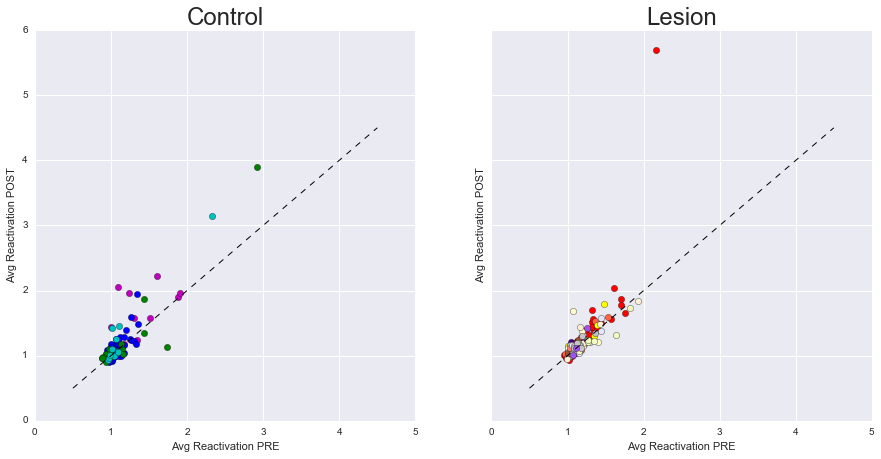

In [164]:
f,(ax1,ax2) = pl.subplots(1,2,figsize=[15,7],sharey=True)
for item in Lesions[:3]:
    GG = pkl.load(open(item,'rb'))
    ax2.scatter(GG[0],GG[1],s =40,c='r')
for ii,item in enumerate(Lesions[3:]):
    GG = pkl.load(open(item,'rb'))
    ax2.scatter(GG[0],GG[1],s =40, c=colors[7+ii])
ax2.plot([0.5,4.5],[0.5,4.5],'k--', lw=1)
for item in Controls[:2]:
    GG = pkl.load(open(item,'rb'))
    ax1.scatter(GG[0],GG[1],s =40,c='m')
for ii,item in enumerate(Controls[3:6]):
    GG = pkl.load(open(item,'rb'))
    ax1.scatter(GG[0],GG[1],s =40,c='b')
GG = pkl.load(open(Controls[2]))
ax1.scatter(GG[0],GG[1],s =40,c='g')
GG = pkl.load(open(Controls[6]))
ax1.scatter(GG[0],GG[1],s =40,c='c')
ax1.plot([0.5,4.5],[0.5,4.5],'k--', lw=1)
ax1.set_ylabel('Avg Reactivation POST')
ax1.set_xlabel('Avg Reactivation PRE')
ax2.set_ylabel('Avg Reactivation POST')
ax2.set_xlabel('Avg Reactivation PRE')
ax1.set_title('Control',fontsize=24)
ax2.set_title('Lesion',fontsize=24)

In [133]:
cList = [item[1] for item in locate('*.rr')]
lList = [item[1] for item in locate('*.lrr')]
for item in cList:
    AAA = pkl.load(open(item,'rb'))
    pl.scatter(AAA[0][0],AAA[1][0],s=80)
for item in lList:
    AAA = pkl.load(open(item,'rb'))
    pl.scatter(AAA[0][0],AAA[1][0],c='r',s=80)



<Container object of 3 artists>

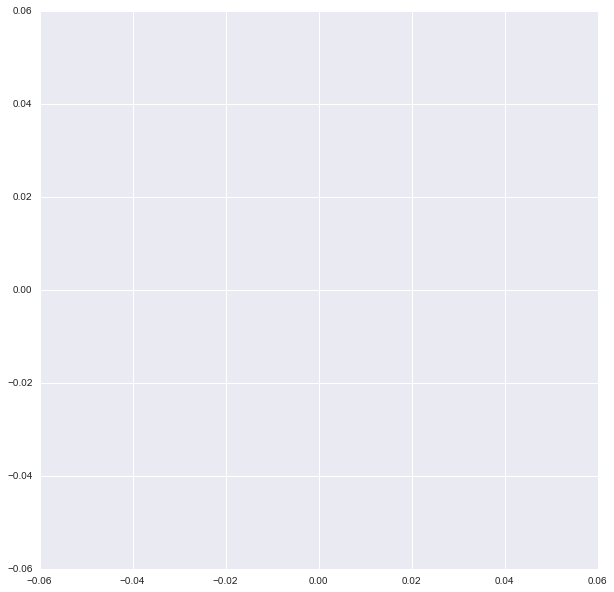

In [134]:
f,ax = pl.subplots(1,1,figsize=[10,10])
x = []
y = []
xerr = []
yerr = []
for item in cList:
    AAA = pkl.load(open(item,'rb'))
    x.append(AAA[0][1])
    y.append(AAA[1][1])
    xerr.append(AAA[0][2])
    yerr.append(AAA[1][2])
pl.errorbar(x,y,xerr,yerr,fmt='o', ecolor='g', capthick=2)
x = []
y = []
xerr = []
yerr = []
for item in lList:
    AAA = pkl.load(open(item,'rb'))
    x.append(AAA[0][3])
    y.append(AAA[1][3])
    xerr.append(AAA[0][4])
    yerr.append(AAA[1][4])
pl.errorbar(x,y,xerr,yerr,color='r',fmt='o', ecolor='c', capthick=2)

<Container object of 3 artists>

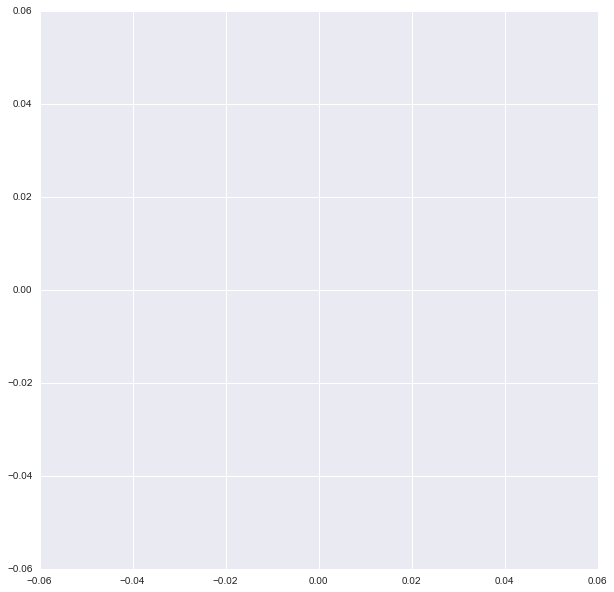

In [135]:
f,ax = pl.subplots(1,1,figsize=[10,10])
x = []
y = []
xerr = []
yerr = []
for item in cList:
    AAA = pkl.load(open(item,'rb'))
    x.append(AAA[0][3])
    y.append(AAA[1][3])
    xerr.append(AAA[0][4])
    yerr.append(AAA[1][4])
pl.errorbar(x,y,xerr,yerr,fmt='o', ecolor='g', capthick=2)
x = []
y = []
xerr = []
yerr = []
for item in lList:
    AAA = pkl.load(open(item,'rb'))
    x.append(AAA[0][3])
    y.append(AAA[1][3])
    xerr.append(AAA[0][4])
    yerr.append(AAA[1][4])
pl.errorbar(x,y,xerr,yerr,color='r',fmt='o', ecolor='c', capthick=2)


0.709401709402


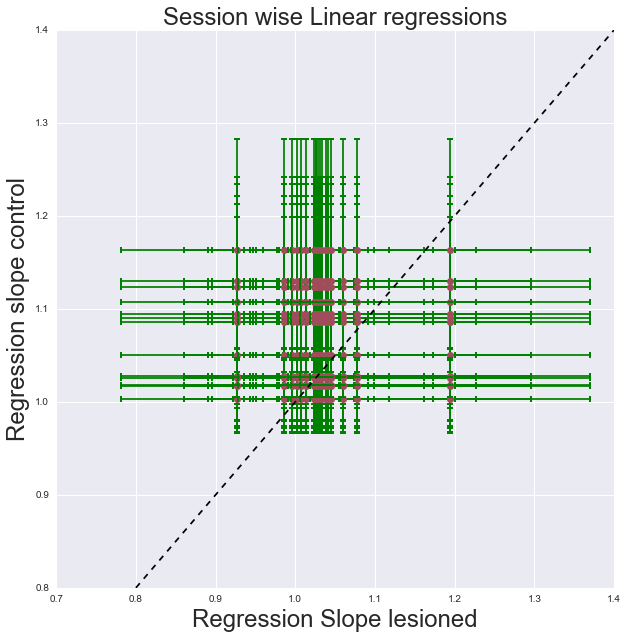

In [37]:
f,ax = pl.subplots(1,1,figsize=[10,10])
combList = list(itertools.product(Controls,Lesions))
gg = 0.0
kk = 0.0
for ii,item in enumerate(combList[:]):
    cnt = pkl.load(open(item[0],'rb'))
    lsn = pkl.load(open(item[1],'rb'))
    if len(lsn) and len(cnt):
        #a,b = np.polyfit(cnt[0],cnt[1],1)
        #c,d = np.polyfit(lsn[0],lsn[1],1)
        cntFit = sm.OLS( cnt[1],cnt[0] ).fit()
        lsnFit = sm.OLS( lsn[1],lsn[0] ).fit()
        x= lsnFit.params
        xerr = np.abs(x-lsnFit.conf_int())
        #xerr_up = [lsnFit.conf_int()[0]-x]
        y = cntFit.params
        yerr = np.abs(y-cntFit.conf_int())
        #yerr_up = [cntFit.conf_int()[0]-y]
        if y>x:
            gg+=1
        kk+=1
            
    else:
        a=-1
        b=-1
        c=-1
        d= -1
    #print ii
    ax.errorbar(x, y, yerr=list(yerr), xerr=list(xerr),
                color=clrs[-1],fmt='o', ecolor='g', capthick=2)
pl.plot([0.8,1.4],[0.8,1.4],'k--')
    #print a,b
    #print c,d
    #print '-----'
pl.ylabel('Regression slope control',fontsize=24)
pl.xlabel('Regression Slope lesioned',fontsize=24)
pl.title('Session wise Linear regressions',fontsize=24)
print gg/kk
f.savefig('/home/chenani/Pictures/BCCN-poster/sessionSlopes.svg',transparent=True)

IndexError: too many indices for array

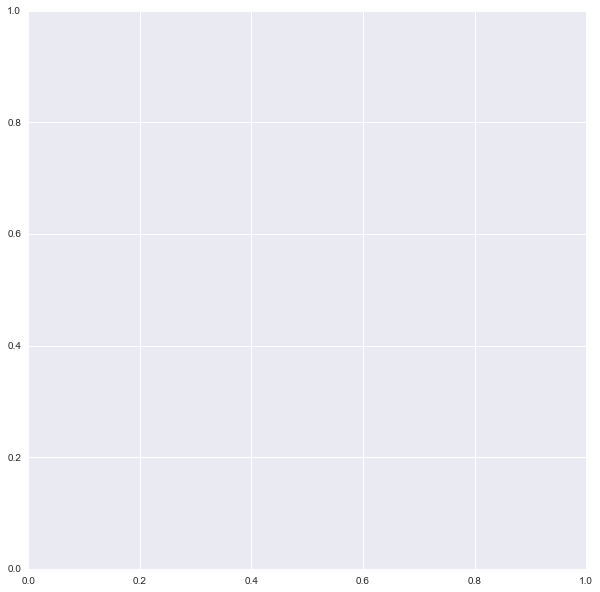

In [137]:
f,ax = pl.subplots(1,1,figsize=[10,10])
cList = [item[1] for item in locate('*.rr')]
lList = [item[1] for item in locate('*.lrr')]
RrCPre = []
RrCPost = []
RrLPre = []
RrLPost = []
for item in cList:
    AAA = pkl.load(open(item,'rb'))
    RrCPre.append([AAA[0][1],AAA[0][0]])
    RrCPost.append([AAA[1][1],AAA[1][0]])
RrCPost = np.array(RrCPost)
RrCPre = np.array(RrCPre)
pl.scatter(RrCPre[:,0],RrCPre[:,1],s=80,facecolors='none', edgecolors=cl3[1],label='pre-Con')
pl.scatter(RrCPost[:,0],RrCPost[:,1],s=80,label='post-Con',c=cl3[1])
for item in lList:
    AAA = pkl.load(open(item,'rb'))
    RrLPre.append([AAA[0][1],AAA[0][0]])
    RrLPost.append([AAA[1][1],AAA[1][0]])
RrLPost = np.array(RrLPost)
RrLPre = np.array(RrLPre)
pl.scatter(RrLPre[:,0],RrLPre[:,1],s=80,facecolors='none', edgecolors=cl3[2],label='pre-Les')
pl.scatter(RrLPost[:,0],RrLPost[:,1],s=80,c=cl3[2],label='post-Les')
pl.legend(loc=4)
pl.ylabel('Incidence rate',fontsize=24)
pl.xlabel('Reactivation amplitude',fontsize=24)
pl.title('All peaks',fontsize=24)
f.savefig('/home/chenani/Pictures/BCCN-poster/AmplitudeFreqz.svg',transparent=True)
#pl.plot([0,50],[ 0.00458325,  0.01900339],'r--')
#pl.plot([0,50],[ 0.00288214,  0.02453673],'r')
#pl.plot([0,50],[ 0.004524  ,  0.00989743],'b')
#pl.plot([0,50],[ 0.00810912,  0.00102817],'b--')

In [27]:
for item in [RrCPre,RrCPost,RrLPre,RrLPost]:
    X = item[:,0]
    X = smp.add_constant(X, prepend=False)
    Rr = item[:,1]
    result = sm.OLS(Rr,X).fit()
    print result.summary()

NameError: name 'smp' is not defined

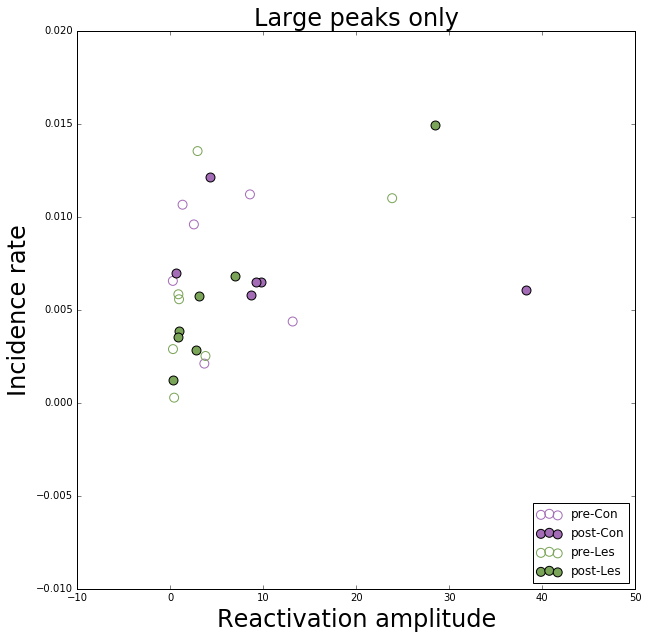

In [31]:
f,ax = pl.subplots(1,1,figsize=[10,10])
cList = [item[1] for item in locate('*.rr')]
lList = [item[1] for item in locate('*.lrr')]
RrsCPre = []
RrsCPost = []
RrsLPre = []
RrsLPost = []
for item in cList:
    AAA = pkl.load(open(item,'rb'))
    RrsCPre.append([AAA[0][3],AAA[0][0]])
    RrsCPost.append([AAA[1][3],AAA[1][0]])
RrsCPost = np.array(RrsCPost)
RrsCPre = np.array(RrsCPre)
pl.scatter(RrsCPre[:,0],RrsCPre[:,1],s=80,facecolors='none', edgecolors=cl3[1],label='pre-Con')
pl.scatter(RrsCPost[:,0],RrsCPost[:,1],s=80,label='post-Con',c=cl3[1])
for item in lList:
    AAA = pkl.load(open(item,'rb'))
    RrsLPre.append([AAA[0][3],AAA[0][0]])
    RrsLPost.append([AAA[1][3],AAA[1][0]])
RrsLPost = np.array(RrsLPost)
RrsLPre = np.array(RrsLPre)
pl.scatter(RrsLPre[:,0],RrsLPre[:,1],s=80,facecolors='none', edgecolors=cl3[2],label='pre-Les')
pl.scatter(RrsLPost[:,0],RrsLPost[:,1],s=80,c=cl3[2],label='post-Les')
pl.legend(loc=4)
pl.ylabel('Incidence rate',fontsize=24)
pl.xlabel('Reactivation amplitude',fontsize=24)
pl.title('Large peaks only',fontsize=24)
f.savefig('/home/chenani/Pictures/BCCN-poster/AmplitudeFreqz2.svg',transparent=True)
#pl.plot([0,50],[ 0.00458325,  0.01900339],'r--')
#pl.plot([0,50],[ 0.00288214,  0.02453673],'r')
#pl.plot([0,50],[ 0.00808033,  0.00489158],'b')
#pl.plot([0,50],[ 0.00768412,  0.00623971],'b--')

In [31]:
for item in [RrsCPre,RrsCPost,RrsLPre,RrsLPost]:
    X = item[:,0]
    X = smp.add_constant(X, prepend=False)
    Rr = item[:,1]
    result = sm.OLS(Rr,X).fit()
    print result.summary()

NameError: name 'smp' is not defined

In [43]:
print ttest_ind(RrCPre[:,0],RrCPost[:,0])
print ttest_ind(RrCPre[:,0],RrLPre[:,0])
print ttest_ind(RrCPre[:,0],RrLPost[:,0])
print ttest_ind(RrCPost[:,0],RrLPre[:,0])
print ttest_ind(RrLPre[:,0],RrLPost[:,0])

Ttest_indResult(statistic=-1.3250921038384167, pvalue=0.21461915712942622)
Ttest_indResult(statistic=-0.40931007645212164, pvalue=0.69016901490845273)
Ttest_indResult(statistic=-0.39065943653534169, pvalue=0.70350869192399224)
Ttest_indResult(statistic=0.1623824786067817, pvalue=0.87394915923098304)
Ttest_indResult(statistic=0.037549280018970226, pvalue=0.97066448509564851)


In [47]:
print ranksums(RrCPre[:,1],RrCPost[:,1])
print ranksums(RrCPre[:,1],RrLPre[:,1])
print ranksums(RrCPre[:,1],RrLPost[:,1])
print ranksums(RrCPost[:,1],RrLPre[:,1])
print ranksums(RrLPre[:,1],RrLPost[:,1])

RanksumsResult(statistic=0.16012815380508713, pvalue=0.87278012379391179)
RanksumsResult(statistic=0.5714285714285714, pvalue=0.56770916619735257)
RanksumsResult(statistic=1.0, pvalue=0.31731050786291415)
RanksumsResult(statistic=1.2857142857142858, pvalue=0.19854279368666194)
RanksumsResult(statistic=-0.063887656499993992, pvalue=0.94905968088593295)


In [48]:
print ranksums(RrsCPre[:,0],RrsCPost[:,0])
print ranksums(RrsCPre[:,0],RrsLPre[:,0])
print ranksums(RrsCPre[:,0],RrsLPost[:,0])
print ranksums(RrsCPost[:,0],RrsLPre[:,0])
print ranksums(RrsCPost[:,0],RrsLPost[:,0])
print ranksums(RrsLPre[:,0],RrsLPost[:,0])

RanksumsResult(statistic=-1.281025230440697, pvalue=0.20018480417757911)
RanksumsResult(statistic=0.5714285714285714, pvalue=0.56770916619735257)
RanksumsResult(statistic=0.2857142857142857, pvalue=0.77509696219598467)
RanksumsResult(statistic=1.7142857142857142, pvalue=0.086476265493665633)
RanksumsResult(statistic=1.4285714285714286, pvalue=0.15312745101966951)
RanksumsResult(statistic=-0.57498890849994588, pvalue=0.56529879830978924)


In [49]:
print ranksums(RrsCPre[:,1],RrsCPost[:,1])
print ranksums(RrsCPre[:,1],RrsLPre[:,1])
print ranksums(RrsCPre[:,1],RrsLPost[:,1])
print ranksums(RrsCPost[:,1],RrsLPre[:,1])
print ranksums(RrsCPost[:,1],RrsLPost[:,1])
print ranksums(RrsLPre[:,1],RrsLPost[:,1])

RanksumsResult(statistic=0.16012815380508713, pvalue=0.87278012379391179)
RanksumsResult(statistic=0.5714285714285714, pvalue=0.56770916619735257)
RanksumsResult(statistic=1.0, pvalue=0.31731050786291415)
RanksumsResult(statistic=1.2857142857142858, pvalue=0.19854279368666194)
RanksumsResult(statistic=1.5714285714285714, pvalue=0.11608313373865504)
RanksumsResult(statistic=-0.063887656499993992, pvalue=0.94905968088593295)


In [50]:
print ttest_ind(RrsCPre[:,1],RrsCPost[:,1])
print ttest_ind(RrsCPre[:,1],RrsLPre[:,1])
print ttest_ind(RrsCPre[:,1],RrsLPost[:,1])
print ttest_ind(RrsCPost[:,1],RrsLPre[:,1])
print ttest_ind(RrsCPost[:,1],RrsLPost[:,1])
print ttest_ind(RrsLPre[:,1],RrsLPost[:,1])

Ttest_indResult(statistic=0.047428623490793513, pvalue=0.96310546496002758)
Ttest_indResult(statistic=0.61215589942804272, pvalue=0.5528777941001759)
Ttest_indResult(statistic=0.80087134062299004, pvalue=0.440161790556863)
Ttest_indResult(statistic=0.64088020592052253, pvalue=0.53472427583350046)
Ttest_indResult(statistic=0.85663599145586056, pvalue=0.40992002785420045)
Ttest_indResult(statistic=0.15520029486179979, pvalue=0.87924341382431626)


In [52]:
Tt

array([ 15.95401656,  11.79141246,   2.86773772,  27.59177418,
        10.80648651,  19.77493264])